In [32]:
# Import Required Libraries
import pandas as pd
import numpy as np

import re
import string

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Load the Dataset
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("true.csv")

In [6]:
# Add Labels
fake["label"] = 0
true["label"] = 1

In [7]:
# Combine the Data
df = pd.concat([fake, true], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
# Quick Data Check
# df.head()


In [9]:
# df.shape

In [10]:
# df["label"].value_counts()

In [11]:
# Check Missing Values
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [12]:
# Define Text Cleaning Function
# This function will:
# Lowercase text
# Remove URLs
# Remove punctuation
# Remove numbers
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"\w*\d\w*", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

In [13]:
# Apply Cleaning on Text Column
df["clean_text"] = df["text"].apply(clean_text)

In [14]:
#Compare Before vs After (IMPORTANT)
# df[["text", "clean_text"]].head()
# This shows how raw news becomes ML-friendly text

In [15]:
# Separate Features & Labels
X = df["clean_text"]
y = df["label"]

In [ ]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 80% training, 20% testing (standard practice)

In [18]:
# : Apply TF-IDF Vectorizer

tfidf = TfidfVectorizer(
    stop_words="english",
    max_df=0.7,
    max_features=5000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [19]:
# Check Vector Shape
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(35918, 5000)
(8980, 5000)


# Interview Tip (VERY IMPORTANT)

# If asked:

# “Why did you use TF-IDF?”

# Answer:

# “TF-IDF captures word importance by reducing the weight of common words and emphasizing informative terms, which improves text classification performance.”

In [ ]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Make Predictions
y_pred = model.predict(X_test_tfidf)

In [23]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

Accuracy 0.9861915367483296


In [24]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4787
           1       0.98      0.99      0.99      4193

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



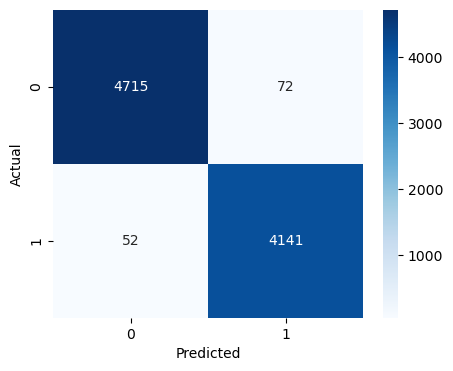

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🧠 How to Explain This in an Interview

“My Logistic Regression model achieved 98.6% accuracy with balanced precision and recall for both fake and real news, indicating strong generalization and minimal bias.”

💯 Perfect answer

In [27]:
# Prediction Function

def predict_news(news_text):
    cleaned = clean_text(news_text)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)[0]

    if prediction == 0:
        return "🟥 Fake News"
    else:
        return "🟩 Real News"

In [28]:
# Test with Custom News
sample_news = """
The government announced a new policy to improve healthcare infrastructure across rural areas.
"""

predict_news(sample_news)
# Try fake-style headlines also and observe results

'🟩 Real News'

In [33]:
# Save Model & Vectorizer
with open("fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("TfidfVectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

Interview Tip

If asked:

“How do you deploy or reuse your model?”

Answer:

“I saved the trained model and TF-IDF vectorizer using pickle, which allows easy deployment in web applications.”